# Crypto Indicators
Based on the 24 Technical Indicators in this paper:
https://www.sciencedirect.com/science/article/abs/pii/S0045790624002969

## The Indicators 
Ordered based off how they build off eachother
| #  | Indicator           | #  | Indicator            |
|----|---------------------|----|----------------------|
| 1  | DIF                 | 13 | W%R(13)              |
| 2  | MACD(9)             | 14 | W%R(21)              |
| 3  | +DI(14)             | 15 | W%R(34)              |
| 4  | -DI(14)             | 16 | %K                   |
| 5  | ADX(14)             | 17 | %D                   |
| 6  | ATR(14)             | 18 | AroonUp              |
| 7  | ADO                 | 19 | AroonDown            |
| 8  | PVT                 | 20 | AroonOSC             |
| 9  | ROC(12)             | 21 | BollingerUp(20)      |
| 10 | CCI(24)             | 22 | BollingerDown(20)    |
| 11 | W%R(5)              | 23 | %b                   |
| 12 | W%R(8)              | 24 | BW                   |


## Imports

In [38]:
import config
import ccxt
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import timedelta

## Fetching OHLCV

In [81]:
exchange = {
        'apiKey': config.KRAKEN_API_KEY,
        'secret': config.KRAKEN_PRIVATE_KEY,
        'enableRateLimit': True
    }
exchange = ccxt.kraken(exchange)

days = 30
since = exchange.milliseconds() - int(timedelta(days=days).total_seconds() * 1000)

try:
    ohlcv = exchange.fetch_ohlcv(symbol='XRP/USD', timeframe='1d')
except ccxt.BaseError as error:
    print(f"Error Fetching OHLCV: {error}")

df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

df.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-14,25928.7,26064.8,24818.0,25123.9,4189.432222
2023-06-15,25124.0,25743.8,24751.1,25577.1,4450.158341
2023-06-16,25577.0,26497.0,25140.0,26323.0,3754.769053
2023-06-17,26323.0,26793.8,26175.0,26511.8,1777.049732
2023-06-18,26511.9,26685.1,26253.2,26334.7,1332.050399


# Trend and Momentum Indicators

## DIF
**What:** Difference between short-term and long-term EMAs (e.g., EMA(12) - EMA(26)).  
**Use:** Indicates bullish when above signal line, bearish when below.

In [82]:
ema12 = df.ta.ema( length=12, append=False)
ema26 = df.ta.ema(length=26, append=False)
df['DIF'] = ema12 - ema26

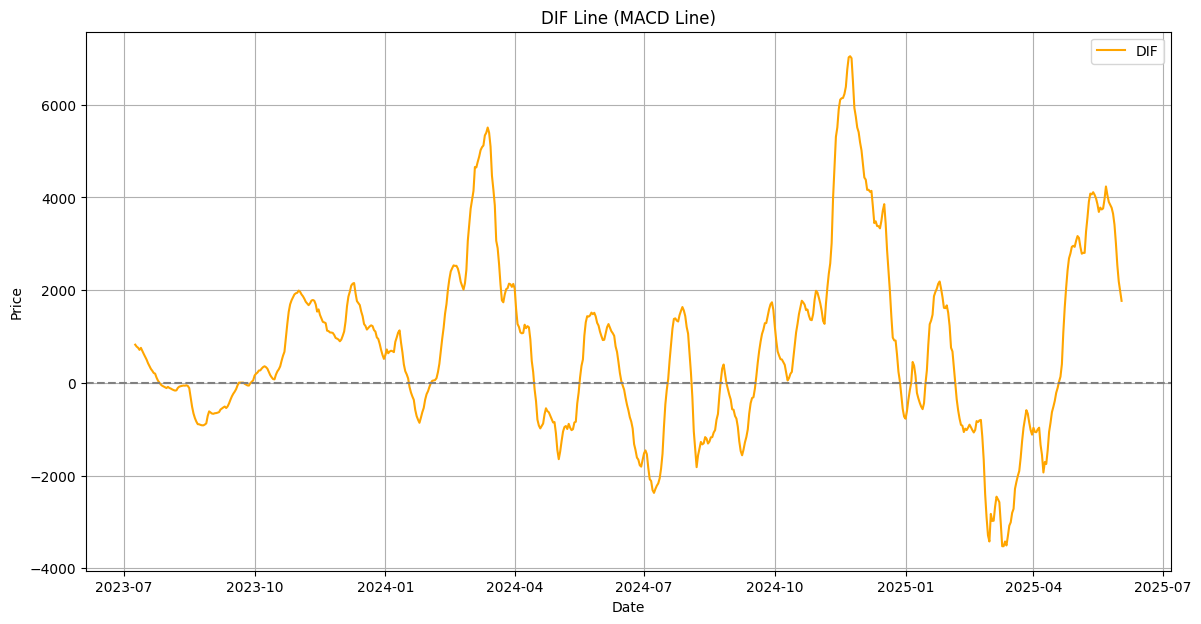

In [108]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['DIF'], label='DIF', color='orange')
plt.axhline(0, color='gray', linestyle='--')  # zero line
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("DIF Line (MACD Line)")
plt.grid(True)
plt.legend()
plt.savefig('DIF Line (MACD Line).png')
plt.show()


## MACD(9)
**What:** DIF minus 9-period EMA (signal line); often plotted with histogram.  
**Use:** Crossovers signal momentum shifts; histogram indicates strength.

In [84]:
df.ta.macd(close=df['close'], fast=12, slow=26, signal=9, append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
timestamp,,,,,,,,,
2025-05-29,107811.7,108888.0,105348.4,105632.4,1219.045231,3014.195442,3014.195442,-586.786013,3600.981454
2025-05-30,105632.5,106333.8,103641.3,104019.7,1368.351629,2539.199661,2539.199661,-849.425435,3388.625096
2025-05-31,104019.7,104933.2,103169.0,104662.0,513.907011,2189.352828,2189.352828,-959.417814,3148.770642
2025-06-01,104662.0,105879.7,103850.0,105712.4,576.912175,1974.099010,1974.099010,-939.737306,2913.836316
2025-06-02,105712.4,105754.8,104673.7,105531.5,223.010687,1768.525231,1768.525231,-916.248867,2684.774099


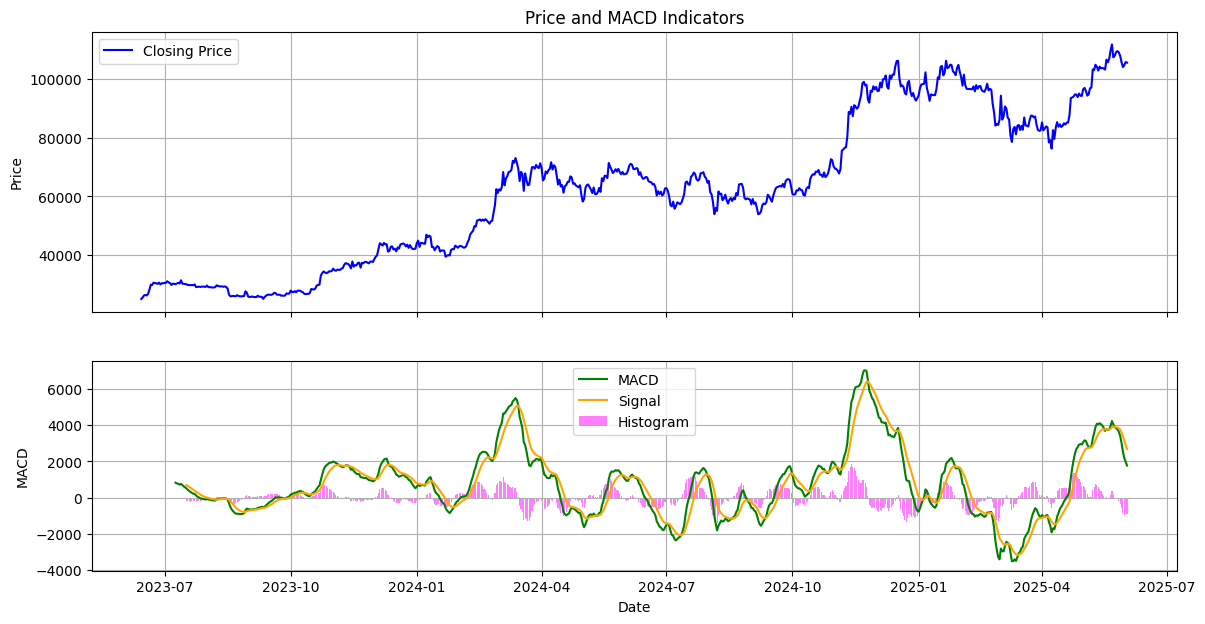

In [109]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1.5]})

# Upper
ax1.plot(df.index, df['close'], label='Closing Price', color='blue')
ax1.set_title("Price and MACD Indicators")
ax1.set_ylabel("Price")
ax1.legend()
ax1.grid(True)
# Lower
ax2.plot(df.index, df['MACD_12_26_9'], label='MACD', color='green')
ax2.plot(df.index, df['MACDs_12_26_9'], label='Signal', color='orange')
ax2.bar(df.index, df['MACDh_12_26_9'], label='Histogram', color='magenta', alpha=0.5)
ax2.set_ylabel("MACD")
ax2.set_xlabel("Date")
ax2.legend()
ax2.grid(True)
plt.savefig("Price and MACD Indicators.png")
plt.show()


## +DI, -DI, ADX

## +DI(14)
**What:** Positive Directional Indicator; strength of upward movement.  
**Use:** A rising +DI suggests an uptrend.

## -DI(14)
**What:** Negative Directional Indicator; strength of downward movement.  
**Use:** A rising -DI suggests a downtrend.

## ADX(14)
**What:** Average Directional Index; measures trend strength (not direction).  
**Use:** ADX > 25 implies strong trend; ADX < 20 implies weak/no trend.

In [86]:
df.ta.adx(high='high', low='low', close='close', legnth=14, append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14
timestamp,,,,,,,,,,,,
2025-05-29,107811.7,108888.0,105348.4,105632.4,1219.045231,3014.195442,3014.195442,-586.786013,3600.981454,28.821642,20.835091,18.941510
2025-05-30,105632.5,106333.8,103641.3,104019.7,1368.351629,2539.199661,2539.199661,-849.425435,3388.625096,27.179652,19.461437,21.872785
2025-05-31,104019.7,104933.2,103169.0,104662.0,513.907011,2189.352828,2189.352828,-959.417814,3148.770642,25.851687,18.596300,22.090545
2025-06-01,104662.0,105879.7,103850.0,105712.4,576.912175,1974.099010,1974.099010,-939.737306,2913.836316,24.158020,20.059870,20.937355
2025-06-02,105712.4,105754.8,104673.7,105531.5,223.010687,1768.525231,1768.525231,-916.248867,2684.774099,22.585330,19.476657,20.328630


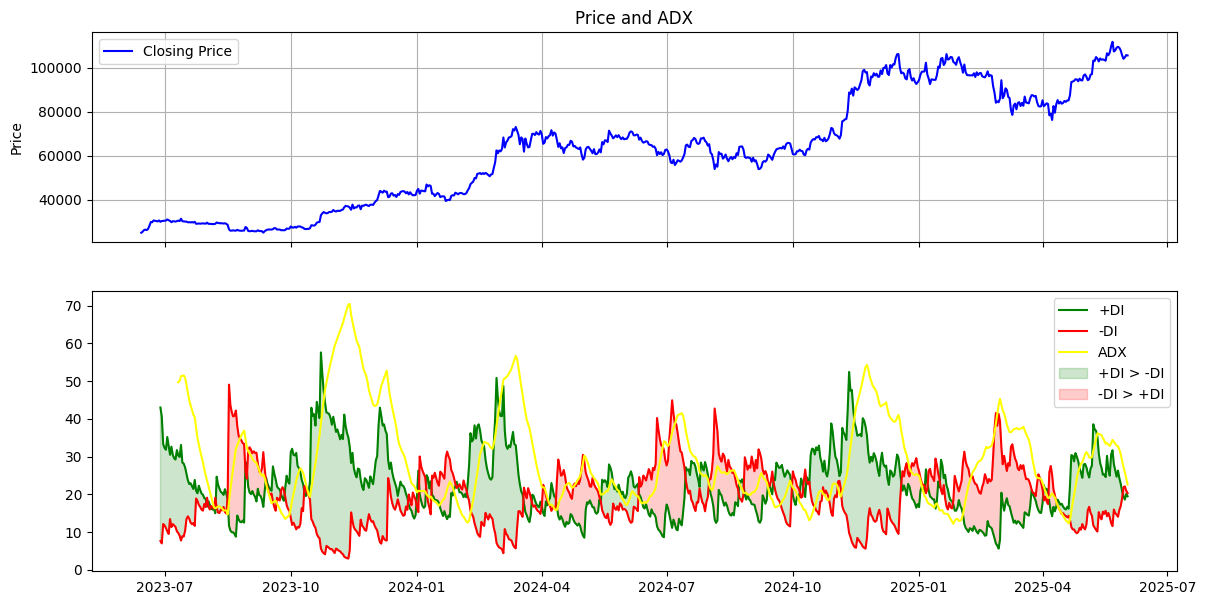

In [110]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharex=True, gridspec_kw={'height_ratios': [1.5, 2]})

# Upper
ax1.plot(df.index, df['close'], label='Closing Price', color='blue')
ax1.set_title("Price and ADX")
ax1.set_ylabel("Price")
ax1.legend()
ax1.grid(True)

# Lower
ax2.plot(df.index, df['DMP_14'], label='+DI', color='green')
ax2.plot(df.index, df['DMN_14'], label='-DI', color='red')
ax2.plot(df.index, df['ADX_14'], label='ADX', color='yellow')

ax2.fill_between(df.index, df['DMP_14'], df['DMN_14'],
                 where=(df['DMP_14'] > df['DMN_14']),
                 interpolate=True, color='green', alpha=0.2, label='+DI > -DI')
ax2.fill_between(df.index, df['DMP_14'], df['DMN_14'],
                 where=(df['DMP_14'] < df['DMN_14']),
                 interpolate=True, color='red', alpha=0.2, label='-DI > +DI')


ax2.legend()

plt.savefig("Price and ADX.png")
plt.show()

# Volatility Indicators

## ATR
**What:** Average True Range; measures market volatility.  
**Use:** Higher ATR means higher risk/volatility; useful for setting stop-loss.

In [88]:
df.ta.atr(append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,ATRr_14
timestamp,,,,,,,,,,,,,
2025-05-29,107811.7,108888.0,105348.4,105632.4,1219.045231,3014.195442,3014.195442,-586.786013,3600.981454,28.821642,20.835091,18.941510,2934.337311
2025-05-30,105632.5,106333.8,103641.3,104019.7,1368.351629,2539.199661,2539.199661,-849.425435,3388.625096,27.179652,19.461437,21.872785,2917.063218
2025-05-31,104019.7,104933.2,103169.0,104662.0,513.907011,2189.352828,2189.352828,-959.417814,3148.770642,25.851687,18.596300,22.090545,2834.715845
2025-06-01,104662.0,105879.7,103850.0,105712.4,576.912175,1974.099010,1974.099010,-939.737306,2913.836316,24.158020,20.059870,20.937355,2777.214713
2025-06-02,105712.4,105754.8,104673.7,105531.5,223.010687,1768.525231,1768.525231,-916.248867,2684.774099,22.585330,19.476657,20.328630,2656.063662


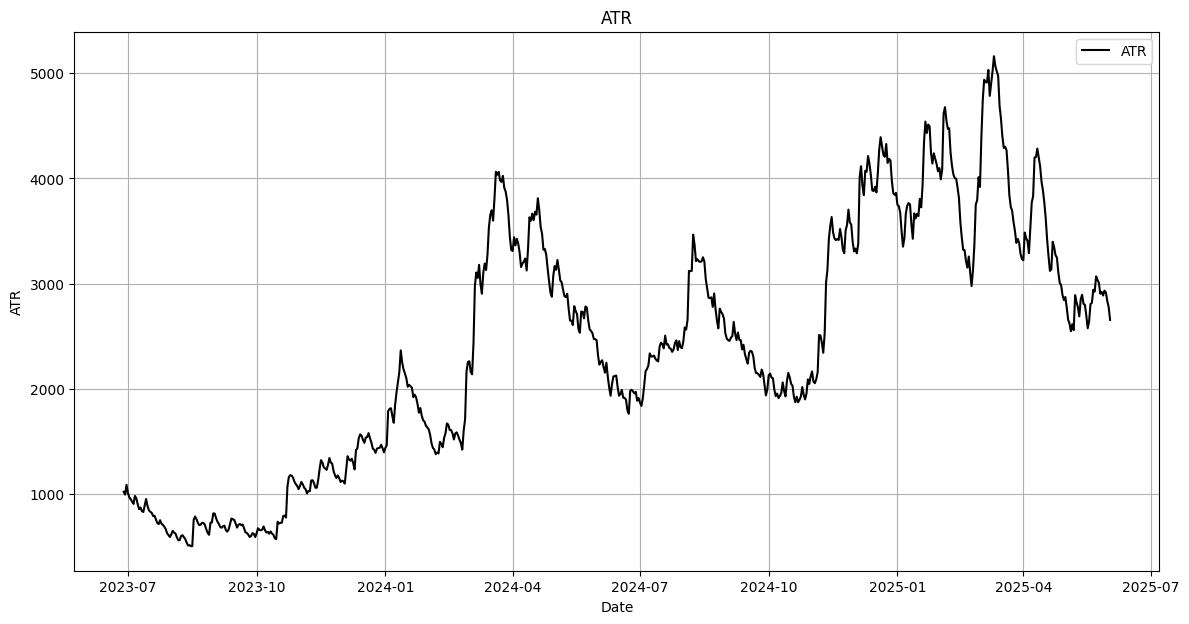

In [111]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['ATRr_14'], label='ATR', color='black')
plt.title('ATR')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.legend()
plt.grid(True)
plt.savefig("ATR.png")
plt.show()

# Volume indicators

## ADO (Accumulation/Distribution Oscillator)

**What:** Combines price and volume to detect accumulation or distribution.    
**Use:** Rising ADO suggests buying pressure; falling indicates selling.

In [90]:
df.ta.ad(high=df['high'], low=df['low'], close=df['close'], volume=df['volume'], open=df['open'], append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,ATRr_14,AD
timestamp,,,,,,,,,,,,,,
2025-05-29,107811.7,108888.0,105348.4,105632.4,1219.045231,3014.195442,3014.195442,-586.786013,3600.981454,28.821642,20.835091,18.941510,2934.337311,164745.785723
2025-05-30,105632.5,106333.8,103641.3,104019.7,1368.351629,2539.199661,2539.199661,-849.425435,3388.625096,27.179652,19.461437,21.872785,2917.063218,163762.046355
2025-05-31,104019.7,104933.2,103169.0,104662.0,513.907011,2189.352828,2189.352828,-959.417814,3148.770642,25.851687,18.596300,22.090545,2834.715845,164117.953614
2025-06-01,104662.0,105879.7,103850.0,105712.4,576.912175,1974.099010,1974.099010,-939.737306,2913.836316,24.158020,20.059870,20.937355,2777.214713,164599.760692
2025-06-02,105712.4,105754.8,104673.7,105531.5,223.010687,1768.525231,1768.525231,-916.248867,2684.774099,22.585330,19.476657,20.328630,2656.063662,164730.646161


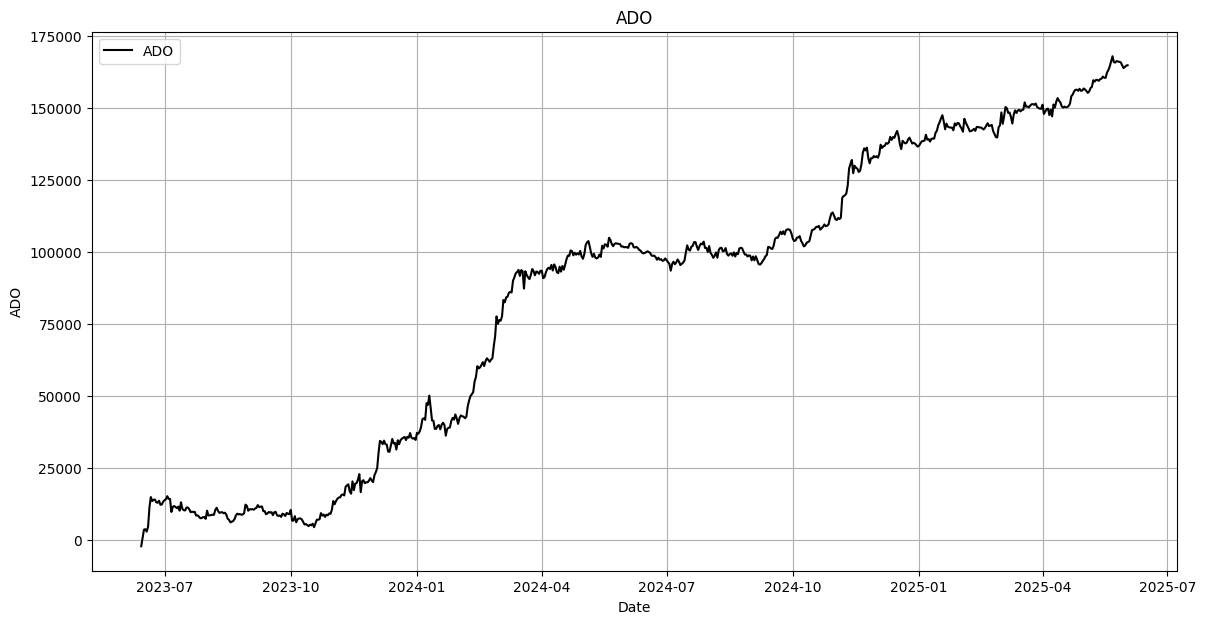

In [112]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['AD'], label='ADO', color='black')
plt.title('ADO')
plt.xlabel('Date')
plt.ylabel('ADO')
plt.legend()
plt.grid(True)
plt.savefig("ADO.png")
plt.show()


## PVT (Price Volume Trend)
**What:** Cumulative indicator combining volume and % price change.  
**Use:** Confirms price trends using volume; rising PVT confirms uptrend.

In [92]:
df.ta.pvt(close=df['close'], volume=df['volume'], append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,ATRr_14,AD,PVT
timestamp,,,,,,,,,,,,,,,
2025-05-29,107811.7,108888.0,105348.4,105632.4,1219.045231,3014.195442,3014.195442,-586.786013,3600.981454,28.821642,20.835091,18.941510,2934.337311,164745.785723,764596.643131
2025-05-30,105632.5,106333.8,103641.3,104019.7,1368.351629,2539.199661,2539.199661,-849.425435,3388.625096,27.179652,19.461437,21.872785,2917.063218,163762.046355,762507.567552
2025-05-31,104019.7,104933.2,103169.0,104662.0,513.907011,2189.352828,2189.352828,-959.417814,3148.770642,25.851687,18.596300,22.090545,2834.715845,164117.953614,762824.894436
2025-06-01,104662.0,105879.7,103850.0,105712.4,576.912175,1974.099010,1974.099010,-939.737306,2913.836316,24.158020,20.059870,20.937355,2777.214713,164599.760692,763403.890202
2025-06-02,105712.4,105754.8,104673.7,105531.5,223.010687,1768.525231,1768.525231,-916.248867,2684.774099,22.585330,19.476657,20.328630,2656.063662,164730.646161,763365.727571


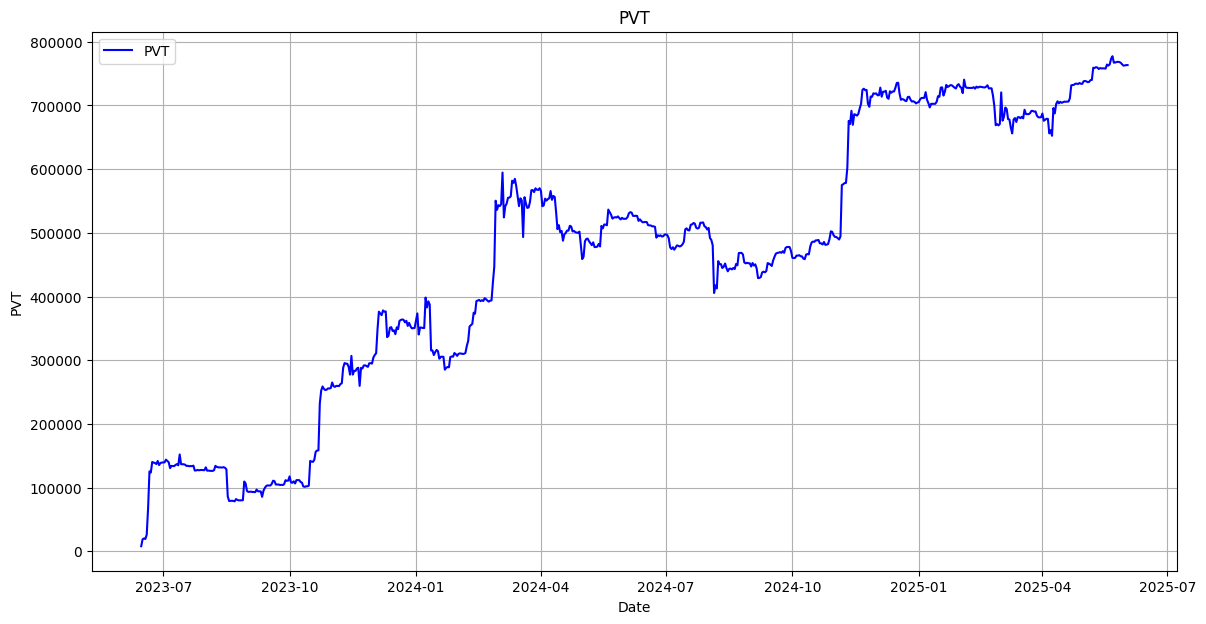

In [117]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['PVT'], color='blue', label='PVT')
plt.title('PVT')
plt.xlabel('Date')
plt.ylabel('PVT')
plt.legend()
plt.grid(True)
plt.savefig("PVT.png")
plt.show()

# Momentum Indicators 

## ROC(12)
**What:** Rate of Change over 12 periods.  
**Use:** Positive = upward momentum; negative = downward.

In [94]:
df.ta.roc(close=df['close'], length=12, append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,ATRr_14,AD,PVT,ROC_12
timestamp,,,,,,,,,,,,,,,,
2025-05-29,107811.7,108888.0,105348.4,105632.4,1219.045231,3014.195442,3014.195442,-586.786013,3600.981454,28.821642,20.835091,18.941510,2934.337311,164745.785723,764596.643131,2.387634
2025-05-30,105632.5,106333.8,103641.3,104019.7,1368.351629,2539.199661,2539.199661,-849.425435,3388.625096,27.179652,19.461437,21.872785,2917.063218,163762.046355,762507.567552,-2.352392
2025-05-31,104019.7,104933.2,103169.0,104662.0,513.907011,2189.352828,2189.352828,-959.417814,3148.770642,25.851687,18.596300,22.090545,2834.715845,164117.953614,762824.894436,-0.923629
2025-06-01,104662.0,105879.7,103850.0,105712.4,576.912175,1974.099010,1974.099010,-939.737306,2913.836316,24.158020,20.059870,20.937355,2777.214713,164599.760692,763403.890202,-1.069855
2025-06-02,105712.4,105754.8,104673.7,105531.5,223.010687,1768.525231,1768.525231,-916.248867,2684.774099,22.585330,19.476657,20.328630,2656.063662,164730.646161,763365.727571,-3.778068


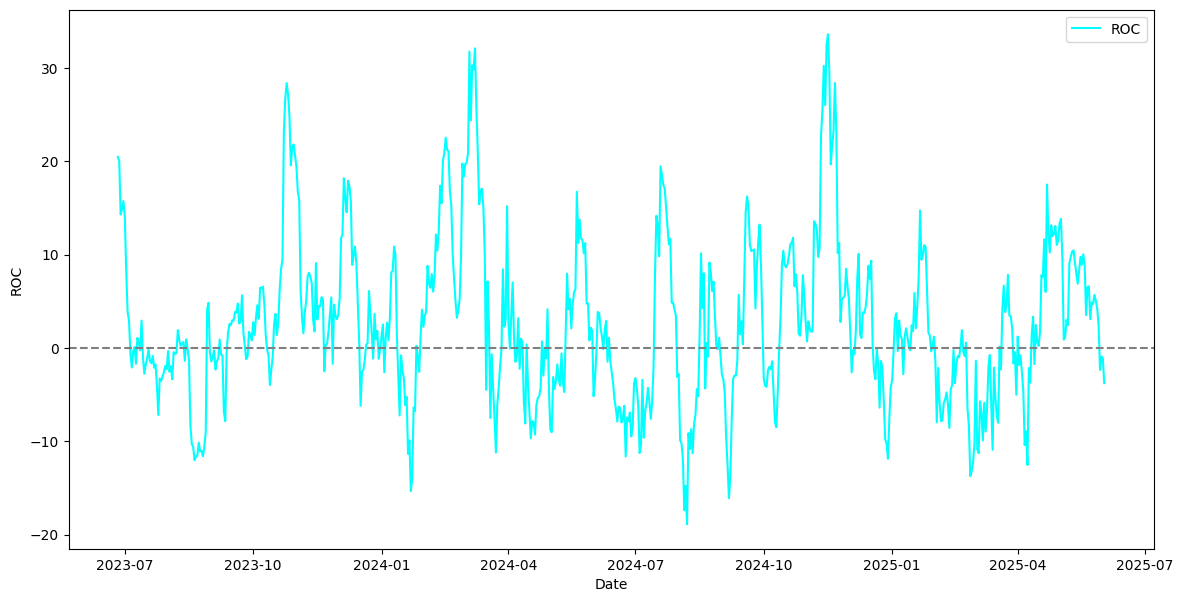

In [114]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['ROC_12'], color='cyan', label='ROC')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('ROC')
plt.legend()
plt.savefig("ROC.png")
plt.show()

## CCI(24)
**What:** Commodity Channel Index; deviation of price from its average.    
**Use:** CCI > +100 = overbought, < -100 = oversold.

In [96]:
df.ta.cci(high=df['high'], low=df['low'], close=df['close'], length=24, append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,ATRr_14,AD,PVT,ROC_12,CCI_24_0.015
timestamp,,,,,,,,,,,,,,,,,
2025-05-29,107811.7,108888.0,105348.4,105632.4,1219.045231,3014.195442,3014.195442,-586.786013,3600.981454,28.821642,20.835091,18.941510,2934.337311,164745.785723,764596.643131,2.387634,37.318107
2025-05-30,105632.5,106333.8,103641.3,104019.7,1368.351629,2539.199661,2539.199661,-849.425435,3388.625096,27.179652,19.461437,21.872785,2917.063218,163762.046355,762507.567552,-2.352392,-18.852450
2025-05-31,104019.7,104933.2,103169.0,104662.0,513.907011,2189.352828,2189.352828,-959.417814,3148.770642,25.851687,18.596300,22.090545,2834.715845,164117.953614,762824.894436,-0.923629,-42.074352
2025-06-01,104662.0,105879.7,103850.0,105712.4,576.912175,1974.099010,1974.099010,-939.737306,2913.836316,24.158020,20.059870,20.937355,2777.214713,164599.760692,763403.890202,-1.069855,-21.769978
2025-06-02,105712.4,105754.8,104673.7,105531.5,223.010687,1768.525231,1768.525231,-916.248867,2684.774099,22.585330,19.476657,20.328630,2656.063662,164730.646161,763365.727571,-3.778068,-19.810163


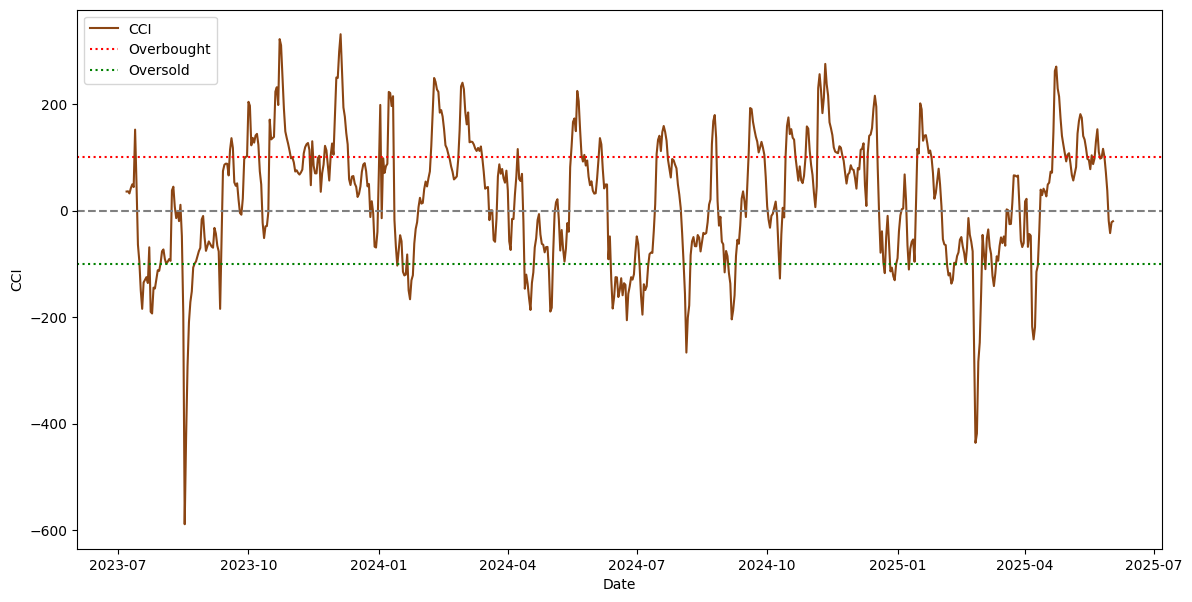

In [116]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['CCI_24_0.015'], color='saddlebrown', label='CCI')
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(100, color='red', linestyle='dotted', label='Overbought')
plt.axhline(-100, color='green', linestyle='dotted', label='Oversold')
plt.xlabel('Date')
plt.ylabel('CCI')
plt.legend()
plt.savefig("CCI.png")
plt.show()

## William %R 
**What:** Williams %R; momentum indicator comparing close to high-low range.  
**Use:** Above -20 = overbought; below -80 = oversold. Shorter periods = more sensitive.

In [98]:
df.ta.willr(high=df['high'], low=df['low'], close=df['close'], length=5, append=True)
df.ta.willr(high=df['high'], low=df['low'], close=df['close'], length=8, append=True)
df.ta.willr(high=df['high'], low=df['low'], close=df['close'], length=13, append=True)
df.ta.willr(high=df['high'], low=df['low'], close=df['close'], length=21, append=True)
df.ta.willr(high=df['high'], low=df['low'], close=df['close'], length=34, append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,...,ATRr_14,AD,PVT,ROC_12,CCI_24_0.015,WILLR_5,WILLR_8,WILLR_13,WILLR_21,WILLR_34
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-05-29,107811.7,108888.0,105348.4,105632.4,1219.045231,3014.195442,3014.195442,-586.786013,3600.981454,28.821642,...,2934.337311,164745.785723,764596.643131,2.387634,37.318107,-94.735086,-95.719539,-64.258540,-56.649956,-33.279534
2025-05-30,105632.5,106333.8,103641.3,104019.7,1368.351629,2539.199661,2539.199661,-849.425435,3388.625096,27.179652,...,2917.063218,163762.046355,762507.567552,-2.352392,-18.852450,-94.671398,-95.353635,-80.576129,-71.035449,-41.730423
2025-05-31,104019.7,104933.2,103169.0,104662.0,513.907011,2189.352828,2189.352828,-959.417814,3148.770642,25.851687,...,2834.715845,164117.953614,762824.894436,-0.923629,-42.074352,-80.286786,-80.286786,-74.077222,-65.306050,-38.364635
2025-06-01,104662.0,105879.7,103850.0,105712.4,576.912175,1974.099010,1974.099010,-939.737306,2913.836316,24.158020,...,2777.214713,164599.760692,763403.890202,-1.069855,-21.769978,-58.174642,-66.417556,-71.144290,-55.936346,-32.982165
2025-06-02,105712.4,105754.8,104673.7,105531.5,223.010687,1768.525231,1768.525231,-916.248867,2684.774099,22.585330,...,2656.063662,164730.646161,763365.727571,-3.778068,-19.810163,-58.690330,-68.806116,-73.196660,-61.202284,-33.933634


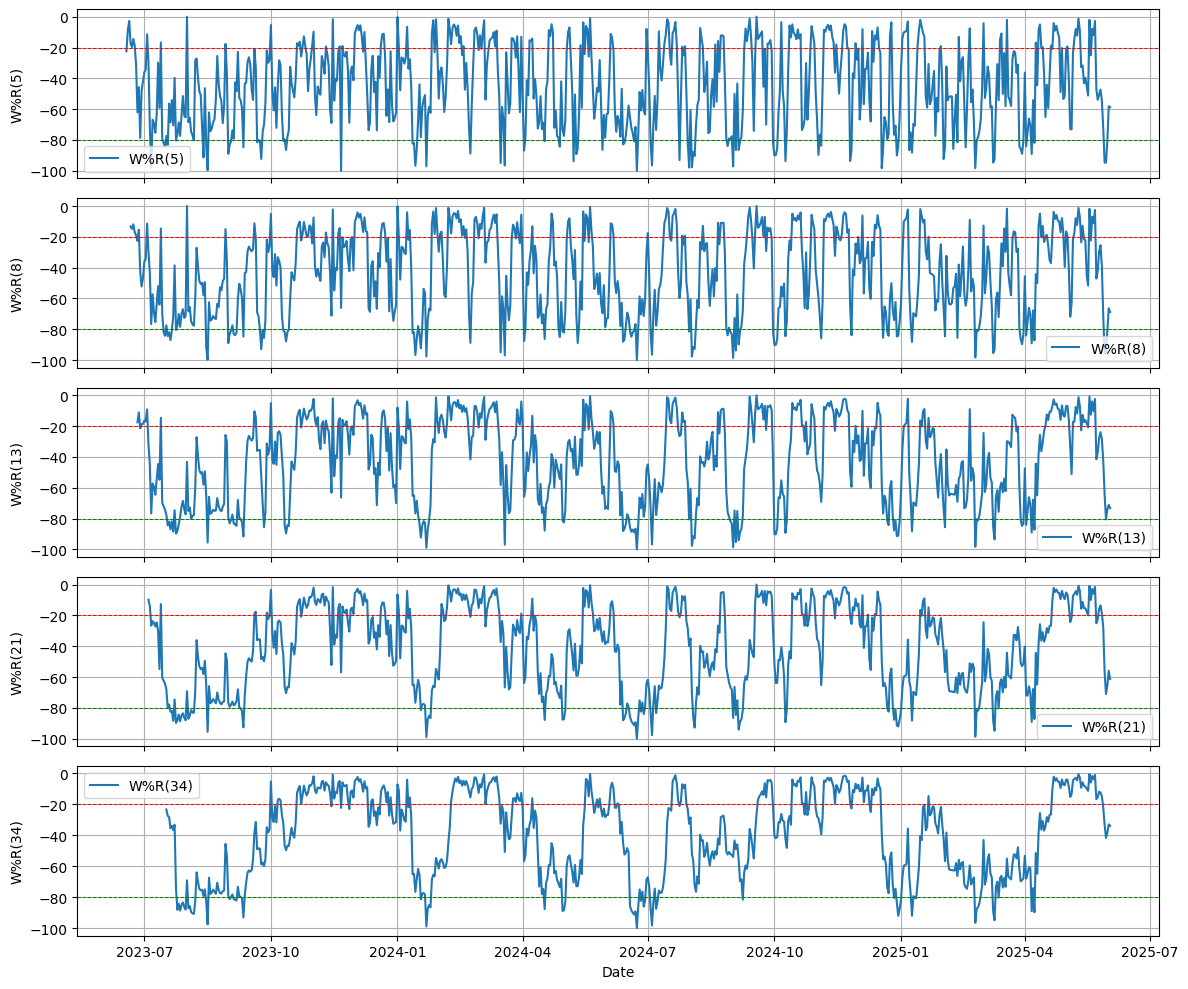

In [118]:
fig, axes = plt.subplots(5, 1, figsize=(12, 10), sharex=True)

for ax, length in zip(axes, [5, 8, 13, 21, 34]):
    column = f'WILLR_{length}'
    ax.plot(df.index, df[column], label=f"W%R({length})")
    ax.axhline(-20, color='red', linestyle='--', linewidth=0.7)
    ax.axhline(-80, color='green', linestyle='--', linewidth=0.7)
    ax.set_ylabel(f"W%R({length})")
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.savefig("Willr.png")
plt.show()

# Oscillators

## %K
**What:** Raw stochastic value; current close vs. recent low-high range.  
**Use:** %K > 80 = overbought; < 20 = oversold.
## %D

**What:** 3-period SMA of %K.  
**Use:** %K crossing %D signals potential trend reversal.

In [100]:
df.ta.stoch(high=df['high'], low=df['low'], close=df['close'], append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,...,PVT,ROC_12,CCI_24_0.015,WILLR_5,WILLR_8,WILLR_13,WILLR_21,WILLR_34,STOCHk_14_3_3,STOCHd_14_3_3
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-05-29,107811.7,108888.0,105348.4,105632.4,1219.045231,3014.195442,3014.195442,-586.786013,3600.981454,28.821642,...,764596.643131,2.387634,37.318107,-94.735086,-95.719539,-64.258540,-56.649956,-33.279534,55.972281,66.431235
2025-05-30,105632.5,106333.8,103641.3,104019.7,1368.351629,2539.199661,2539.199661,-849.425435,3388.625096,27.179652,...,762507.567552,-2.352392,-18.852450,-94.671398,-95.353635,-80.576129,-71.035449,-41.730423,38.531180,54.647966
2025-05-31,104019.7,104933.2,103169.0,104662.0,513.907011,2189.352828,2189.352828,-959.417814,3148.770642,25.851687,...,762824.894436,-0.923629,-42.074352,-80.286786,-80.286786,-74.077222,-65.306050,-38.364635,27.029370,40.510943
2025-06-01,104662.0,105879.7,103850.0,105712.4,576.912175,1974.099010,1974.099010,-939.737306,2913.836316,24.158020,...,763403.890202,-1.069855,-21.769978,-58.174642,-66.417556,-71.144290,-55.936346,-32.982165,27.299188,30.953246
2025-06-02,105712.4,105754.8,104673.7,105531.5,223.010687,1768.525231,1768.525231,-916.248867,2684.774099,22.585330,...,763365.727571,-3.778068,-19.810163,-58.690330,-68.806116,-73.196660,-61.202284,-33.933634,29.759011,28.029189


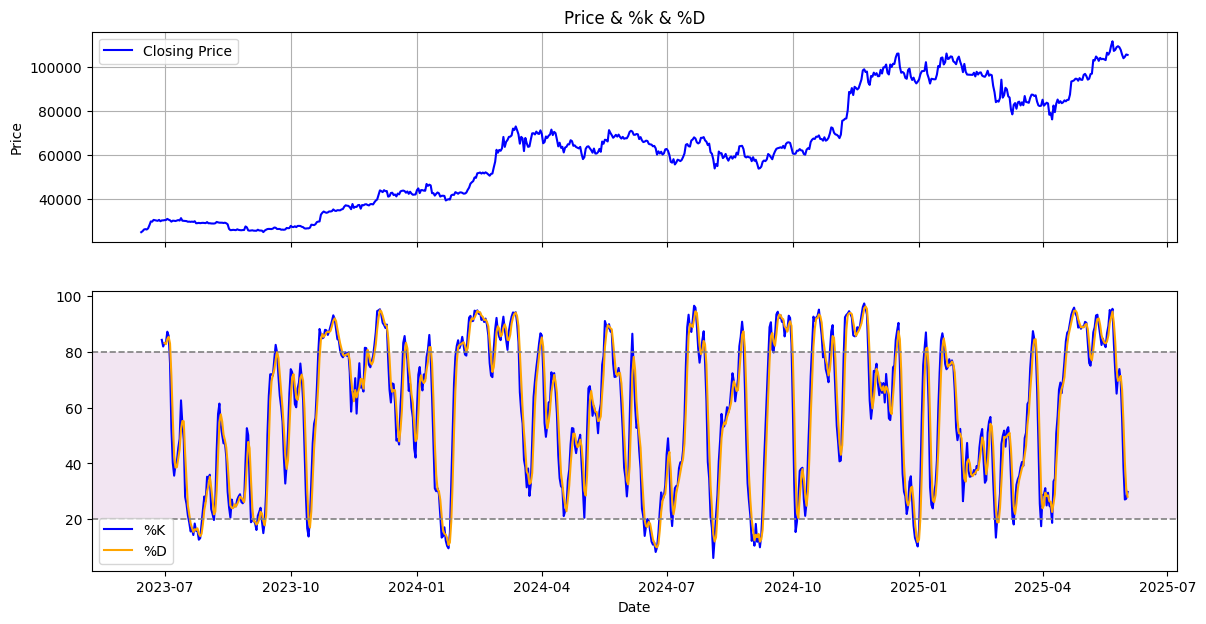

In [119]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharex=True, gridspec_kw={'height_ratios': [1.5, 2]})

# Upper
ax1.plot(df.index, df['close'], label='Closing Price', color='blue')
ax1.set_title("Price & %k & %D")
ax1.set_ylabel("Price")
ax1.legend()
ax1.grid(True)

# Lower
ax2.plot(df.index, df['STOCHk_14_3_3'], label='%K', color='blue')
ax2.plot(df.index, df['STOCHd_14_3_3'], label='%D', color='orange')
ax2.axhline(20, color='grey', linestyle='--', linewidth=1.2)
ax2.axhline(80, color='grey', linestyle='--', linewidth=1.2)
ax2.axhspan(20, 80, facecolor='purple', alpha=0.1)
ax2.set_xlabel("Date")

ax2.legend()
plt.savefig("StochK and StochD.png")
plt.show()


# Trend Oscillators

## AroonUp
**What:** Days since highest high over 25 periods.  
**Use:** AroonUp near 100 = strong uptrend.
## AroonDown
**What:** Days since lowest low.  
**Use:** AroonDown near 100 = strong downtrend.
## AroonOSC
**What:** AroonUp - AroonDown.  
**Use:** Positive = bullish trend; negative = bearish trend.

In [102]:
df.ta.aroon(close=df['close'], length=25, append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,...,WILLR_5,WILLR_8,WILLR_13,WILLR_21,WILLR_34,STOCHk_14_3_3,STOCHd_14_3_3,AROOND_25,AROONU_25,AROONOSC_25
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-05-29,107811.7,108888.0,105348.4,105632.4,1219.045231,3014.195442,3014.195442,-586.786013,3600.981454,28.821642,...,-94.735086,-95.719539,-64.258540,-56.649956,-33.279534,55.972281,66.431235,8.0,72.0,64.0
2025-05-30,105632.5,106333.8,103641.3,104019.7,1368.351629,2539.199661,2539.199661,-849.425435,3388.625096,27.179652,...,-94.671398,-95.353635,-80.576129,-71.035449,-41.730423,38.531180,54.647966,4.0,68.0,64.0
2025-05-31,104019.7,104933.2,103169.0,104662.0,513.907011,2189.352828,2189.352828,-959.417814,3148.770642,25.851687,...,-80.286786,-80.286786,-74.077222,-65.306050,-38.364635,27.029370,40.510943,0.0,64.0,64.0
2025-06-01,104662.0,105879.7,103850.0,105712.4,576.912175,1974.099010,1974.099010,-939.737306,2913.836316,24.158020,...,-58.174642,-66.417556,-71.144290,-55.936346,-32.982165,27.299188,30.953246,0.0,60.0,60.0
2025-06-02,105712.4,105754.8,104673.7,105531.5,223.010687,1768.525231,1768.525231,-916.248867,2684.774099,22.585330,...,-58.690330,-68.806116,-73.196660,-61.202284,-33.933634,29.759011,28.029189,0.0,56.0,56.0


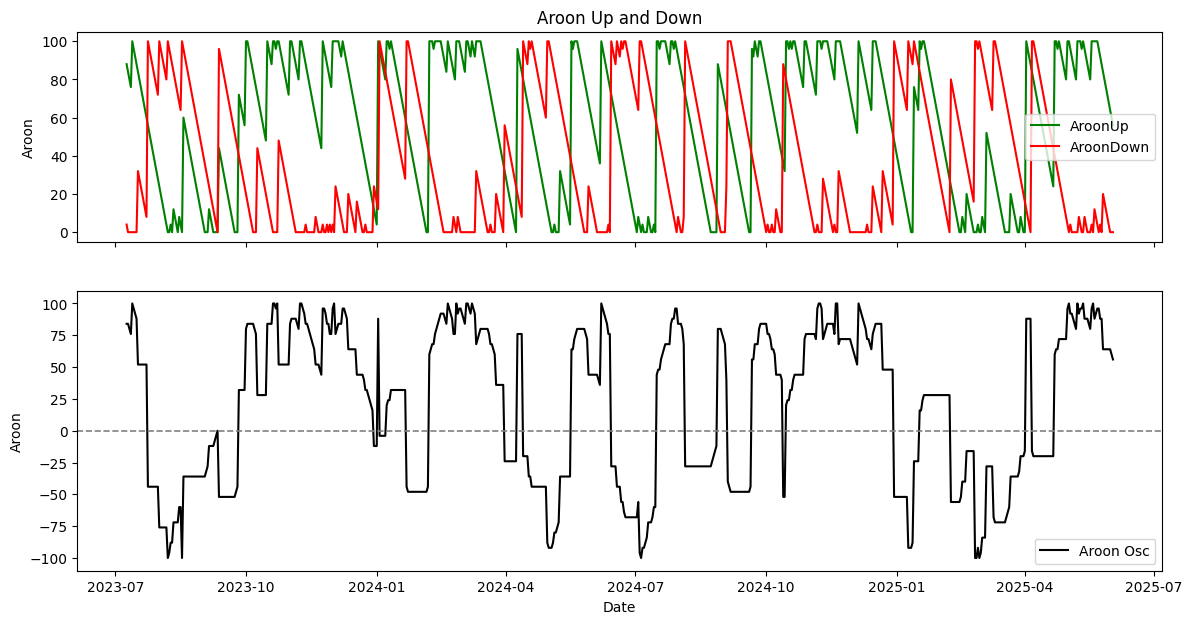

In [120]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharex=True, gridspec_kw={'height_ratios': [1.5, 2]})

# Upper
ax1.plot(df.index, df['AROONU_25'], label='AroonUp', color='green')
ax1.plot(df.index, df['AROOND_25'], label='AroonDown', color='red')
ax1.set_title("Aroon Up and Down")
ax1.set_ylabel("Aroon")
ax1.legend()

# Lower
ax2.plot(df.index, df['AROONOSC_25'], label='Aroon Osc', color='black')
ax2.axhline(0, color='grey', linestyle='--', linewidth=1.2)
ax2.set_ylabel("Aroon")
ax2.set_xlabel("Date")
ax2.legend()
plt.savefig("Aroon Up and Down.png")
plt.show()


# Bollinger Band Suite

## BollingerUp(20)
**What:** 20-period SMA + 2*STD.  
**Use:** Upper boundary of price volatility.
## BollingerDown(20)
**What:** 20-period SMA - 2*STD.  
**Use:** Lower boundary of price volatility.
## %b
**What:** Where price is within Bollinger Bands (0 to 1 scale).  
**Use:** >1 = breakout above; <0 = breakdown below.
## BW (Bandwidth)
**What:** Width of Bollinger Bands relative to SMA.  
**Use:** Wider = more volatility; narrower = consolidation.

In [104]:
df.ta.bbands(close=df['close'], length=20, std=2, append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,...,STOCHk_14_3_3,STOCHd_14_3_3,AROOND_25,AROONU_25,AROONOSC_25,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-05-29,107811.7,108888.0,105348.4,105632.4,1219.045231,3014.195442,3014.195442,-586.786013,3600.981454,28.821642,...,55.972281,66.431235,8.0,72.0,64.0,101271.261823,106322.105,111372.948177,9.501022,0.431724
2025-05-30,105632.5,106333.8,103641.3,104019.7,1368.351629,2539.199661,2539.199661,-849.425435,3388.625096,27.179652,...,38.531180,54.647966,4.0,68.0,64.0,101174.099773,106283.090,111392.080227,9.613929,0.278489
2025-05-31,104019.7,104933.2,103169.0,104662.0,513.907011,2189.352828,2189.352828,-959.417814,3148.770642,25.851687,...,27.029370,40.510943,0.0,64.0,64.0,101241.930409,106310.240,111378.549591,9.534941,0.337397
2025-06-01,104662.0,105879.7,103850.0,105712.4,576.912175,1974.099010,1974.099010,-939.737306,2913.836316,24.158020,...,27.299188,30.953246,0.0,60.0,60.0,101633.148159,106454.610,111276.071841,9.058249,0.423031
2025-06-02,105712.4,105754.8,104673.7,105531.5,223.010687,1768.525231,1768.525231,-916.248867,2684.774099,22.585330,...,29.759011,28.029189,0.0,56.0,56.0,101796.623662,106523.350,111250.076338,8.874536,0.395081


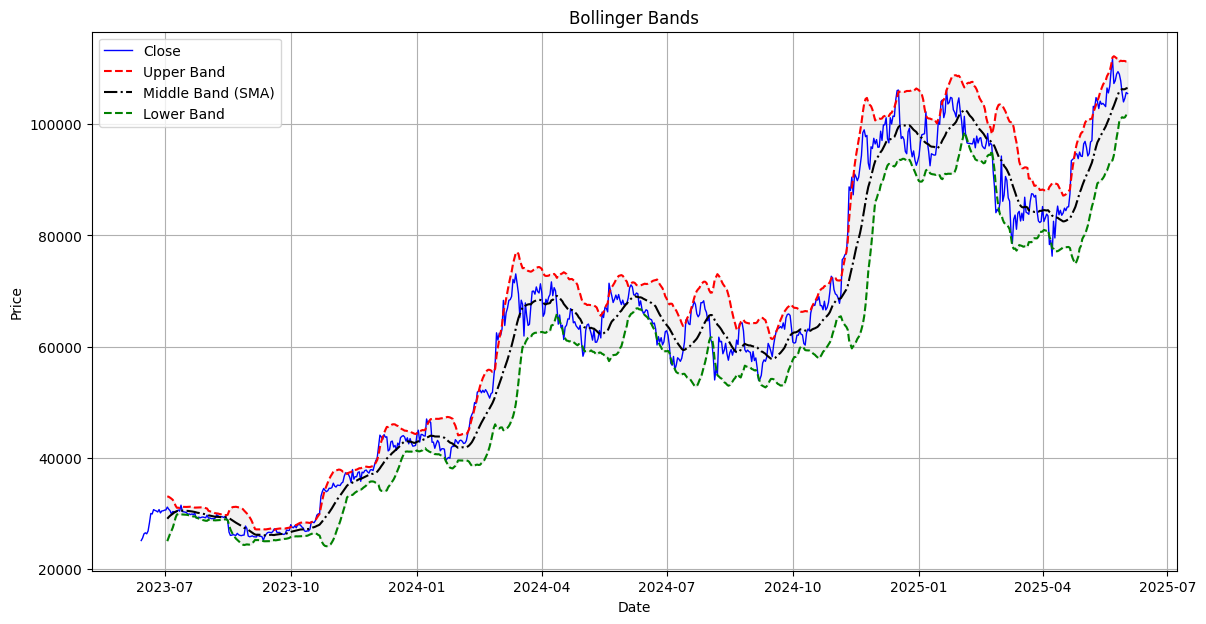

In [121]:
df.ta.bbands(length=20, std=2, append=True)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close', color='blue', linewidth=1)
plt.plot(df.index, df['BBU_20_2.0'], label='Upper Band', color='red', linestyle='--')
plt.plot(df.index, df['BBM_20_2.0'], label='Middle Band (SMA)', color='black', linestyle='-.')
plt.plot(df.index, df['BBL_20_2.0'], label='Lower Band', color='green', linestyle='--')

# Fill the area between upper and lower bands
plt.fill_between(df.index, df['BBL_20_2.0'], df['BBU_20_2.0'], color='gray', alpha=0.1)

plt.title("Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.savefig("Bollinger Bands.png")
plt.show()